In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

conn = engine.connect()

In [9]:
Measurement_data = pd.read_sql("SELECT * FROM Measurement", conn)
Station_data = pd.read_sql("SELECT * FROM Station", conn)

In [10]:
#Checking import of data
Measurement_data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [11]:
#Checking import of data
Station_data.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [12]:
# Find the most recent date in the data set.
latest_date = Measurement_data.date.max()
latest_date

'2017-08-23'

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
date_range = (dt.date(2017,8,23)) - (dt.timedelta(days=365))
print(date_range)

# Calculate the date one year from the last date in data set.
#'2017-08-23' minus one year is 2016-8-23

2016-08-23


In [14]:
# Calculate the date one year from the last date in data set.
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [15]:
year_ago = dt.date(2017,8,23) - dt.timedelta(days= 365)
print(year_ago)

2016-08-23


In [16]:
# Perform a query to retrieve the data and precipitation scores
precip_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_range)
#Check
precip_scores.first()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_score_pd = pd.DataFrame(precip_scores)
precip_score_pd.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [17]:
# Sort the dataframe by date
precip_score_pd['date'] = pd.to_datetime(precip_score_pd['date'])
precip_pd = precip_score_pd.sort_values(by=['date'])
precip_pd.head(10)

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
1192,2016-08-23,0.02
1,2016-08-24,0.08
1530,2016-08-24,2.15
705,2016-08-24,2.28


In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_pd = precip_pd.set_index(precip_pd['date'])
precip_pd.head()

,date,prcp
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15


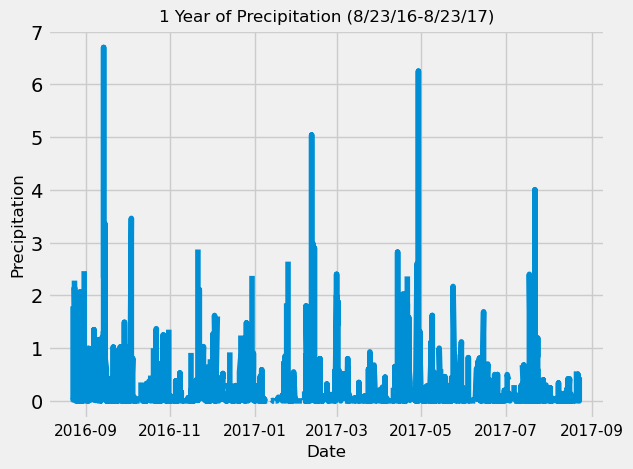

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
plt.plot(precip_pd.prcp)

fontsize = 12
plt.xlabel('Date', fontsize=fontsize)
plt.ylabel('Precipitation', fontsize=fontsize)
plt.title('1 Year of Precipitation (8/23/16-8/23/17)', fontsize=fontsize)
plt.xticks(fontsize = (fontsize-1))


plt.show()

# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
#session.query(Measurement.station).group_by(Measurement.station).count()
total_stations = session.query(Station.station).group_by(Station.station).all()
print(total_stations)


print(f'There are {len(total_stations)} total stations.')
               
#session.query(func.count(Station.station)).all()

[('USC00511918',), ('USC00513117',), ('USC00514830',), ('USC00516128',), ('USC00517948',), ('USC00518838',), ('USC00519281',), ('USC00519397',), ('USC00519523',)]
There are 9 total stations.


In [21]:
#session.query(func.count(Measurement.station)).all()

In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station,(func.count(Measurement.tobs))).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc())

station_activity.all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#Most active station is USC00519281

top_station_temp = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station =='USC00519281')


top_station_temp.first()   

('USC00519281', 70.0)

In [24]:
top_station_temp = pd.DataFrame(top_station_temp)
top_station_temp.head()

temps = top_station_temp['tobs']
print(f'Highest: {(temps).max()}, Lowest: {(temps.min())}, Average: {(temps).mean()}')

Highest: 85.0, Lowest: 54.0, Average: 71.66378066378067


In [25]:
#Using the most active station id, Query the last 12 months of temperature observation data for this station

last_12_months_temp = session.query(Measurement.tobs, Measurement.date).filter(Measurement.date >= date_range).filter(Measurement.station == 'USC00519281')

#Check query 
last_12_months_temp.first()

(77.0, '2016-08-23')

In [26]:
#Check date format for plotting, convert to DF 

last_12_months_temp_pd = pd.DataFrame(last_12_months_temp)

last_12_months_temp_pd['date'] = pd.to_datetime(last_12_months_temp_pd['date'])
last_12_months_temp_pd = last_12_months_temp_pd.sort_values(by=['date'])
last_12_months_temp_pd = last_12_months_temp_pd.set_index(last_12_months_temp_pd['date'])

last_12_months_temp_pd.head()

,tobs,date
date,,
2016-08-23,77.0,2016-08-23
2016-08-24,77.0,2016-08-24
2016-08-25,80.0,2016-08-25
2016-08-26,80.0,2016-08-26
2016-08-27,75.0,2016-08-27


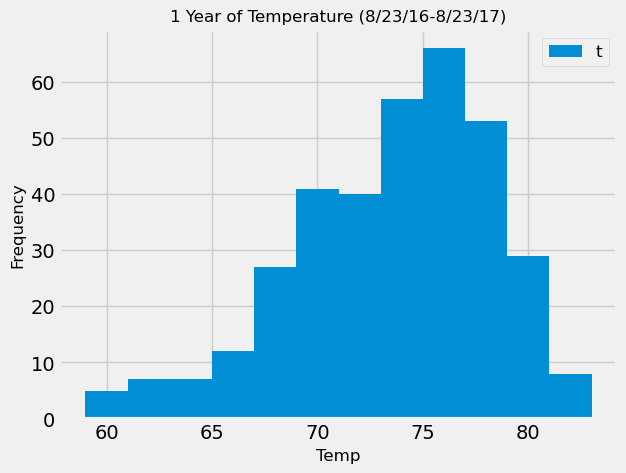

In [27]:
#plot the results as a histogram
hist_data = last_12_months_temp_pd['tobs']
hist_data.hist(bins = 12)

# fontsize = 12
plt.xlabel('Temp', fontsize=fontsize)
plt.ylabel('Frequency', fontsize=fontsize)
plt.title('1 Year of Temperature (8/23/16-8/23/17)', fontsize=fontsize)
plt.legend('tobs', fontsize = fontsize, loc = 'best')


plt.show()

In [28]:
# Close Session
session.close()